In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# import chardet
# rawdata = open('loan.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)

In [3]:
df=pd.read_csv('loan.csv', encoding='utf-8',low_memory=False)
df.shape

(39717, 111)

In [4]:
df.dropna(axis='columns', how='all', inplace = True)
df.shape

(39717, 57)

__Column removal/rationalisation notes__
1. All the columns with all values as missing deleated 
1. 'desc' and 'title' column were deleated since we have 'purpose' code which gives us same information in better way
2. 'member_id','url' and'id' are unique identifier for all records- however doesnt have any analysis value 
3.   'next_pymnt_d','mths_since_last_record','mths_since_last_delinq''last_pymnt_d','last_pymnt_amnt', 'last_credit_pull_d are deleated given high missing values and little use for analysis.
4. Following variables are selected for deleation basis minimal/ no utility for analysis

 - 'recoveries' - post delinquency recoveries (post facto variable)
 - 'emp_title'- annual salary is one of the variable cosidered - title with no clear direction/order 
 - 'earliest_cr_line'- while it could be useful 
 - 'open_acc'- more of information on client - than any anlysis significance
 - 'funded_amnt'- loan amount is considered hence this was considered redundant
 - 'funded_amnt_inv'- loan amount is considered hence this was considered redundant
 - 'initial_list_status'- considered redundand - we anyways have data with only cases which were approved by bank.
 - 'pymnt_plan'- have single value for dataset provided - hence considerd redundant
 - 'total_pymnt'- loan status anyways provides signal of payment made
 - 'revol_bal'- % utilisation considered which is ratio hence preferred
 - 'collections_12_mths_ex_med'- has single value of zero
 - 'acc_now_delinq'- has single value of zero
 - 'chargeoff_within_12_mths' - has single value of zero
 - 'delinq_amnt',- has single value of zero
 - 'tax_liens'- has single value of zero
 - 'total_pymnt_inv' - absolute value with little signifiance for analysis
 - 'out_prncp_inv'- absolute value with little signifiance for analysis
 - 'zip_code',- State code kept for location wise analysis
 - 'policy_code' - has single value of one
 - 'out_prncp'- absolute value with little signifiance for analysis
 - 'total_pymnt',-absolute value with little signifiance for analysis
 - 'total_rec_prncp'- absolute value with little signifiance for analysis
 - 'application_type'- has single value of 'individual'- no analysis significance
 - 'total_rec_int' - absolute value with little signifiance for analysis
 - 'total_rec_late_fee'- operational item 
 - 'recoveries' - post default operational item 
 - 'collection_recovery_fee'- post default operational item 
 - 'installment' - absolute number with no analystics significance

In [5]:
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','member_id','url',
         'recoveries','emp_title','earliest_cr_line','open_acc','funded_amnt',
         'initial_list_status','funded_amnt_inv','pymnt_plan','total_pymnt','revol_bal',
         'collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt',
         'tax_liens','title','total_pymnt_inv','out_prncp_inv','zip_code','policy_code','out_prncp','total_pymnt'
         ,'total_rec_prncp','application_type','total_rec_int','total_rec_late_fee','recoveries',
         'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','id','installment'], axis=1,inplace= True)
df.shape

(39717, 20)

In [6]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

__Missing value Rows__
1. Since the date loss through removal of rows with missing value is not much - same is applied for simplification.

In [7]:
df.dropna(how="any", inplace=True)
df.shape
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

__Transformation of the variable for further analysis__
- interest rate - string to float for numerical analysis
- interest rate - string to float for numerical analysis
- issue_d - from string to datetime for numerical analysis
- loan term - column transformation for numerical analysis

In [8]:
df.loc[:,'int_rate'] = df['int_rate'].map(lambda x: str(x).split('%')[0])
df['int_rate']=df.int_rate.astype(float)
df.loc[:,'revol_util'] = df['revol_util'].map(lambda x: str(x).split('%')[0])
df['revol_util']=df.revol_util.astype(float)
df['term']=df['term'].map(lambda x: str(x).replace('months','')).astype(int)

In [9]:
df.to_csv("clean_df.csv", index=False )

In [10]:
df=pd.read_csv('clean_df.csv', encoding='utf-8')

Extracting Year from Issue_d variable for date time analysis

In [11]:
df['issue_d']=pd.to_datetime(df["issue_d"], format='%b-%y', yearfirst=False)
df['year']=df['issue_d'].dt.year
print(df.dtypes)
df.shape

loan_amnt                        int64
term                             int64
int_rate                       float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
year                             int64
dtype: object


(37898, 21)

__Creating two data sets for population__
1. df_fp - who have fully paid and 
2. df_co - those who have defaulted/charged off

In [12]:
print(df.loan_status.value_counts(normalize=True))
df_fp=df.loc[(df.loan_status=='Fully Paid'),]
df_co=df.loc[(df.loan_status=='Charged Off'),]

Fully Paid     0.832076
Charged Off    0.138952
Current        0.028973
Name: loan_status, dtype: float64


# Univariate Analysis

__Loan Amount__
1. Distribution of loan amount accross the range - Loan amount majorly varies from 5600 to 15000 with median of 10000.
2. Count plot for YOY loan disbursal - there is exponential growth in Loan disbursement.


count    37898.000000
mean     11324.333738
std       7478.589882
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


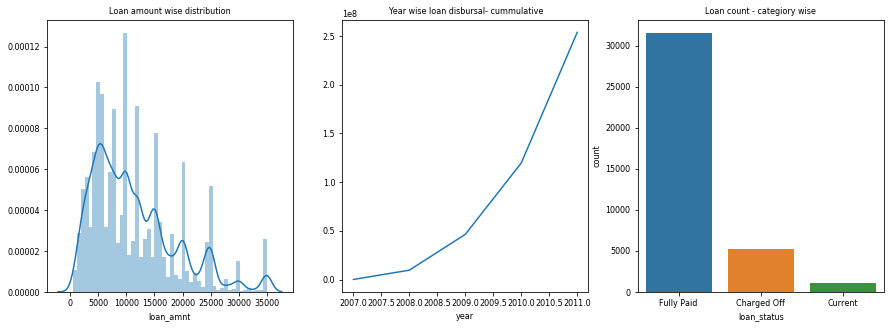

In [13]:
print(df.loan_amnt.describe())
plt.figure(figsize=(15,5))
# plt.matplotlib.rcParams.update({'font.size': 15})
plt.subplot(131)
plt.title('Loan amount wise distribution')
sns.distplot(df['loan_amnt'])
plt.subplot(132)
plt.title('Year wise loan disbursal- cummulative')
df.groupby('year').loan_amnt.sum().plot()
plt.subplot(133)
plt.title('Loan count - categiory wise')
sns.countplot(x="loan_status", data=df)

__Interest Rate__
1. First two plot shows the distribution of Interest rate across fully paid and charge off customer - Pricing of the company seems right - given higer pricing for risky loans. ( which is again confirmed futher through grade wise plottoing in subsequent analysis).
2. Third plot is interst rate curve for time period - 2007 - 2011 for loan portfolio- with peak seen in 2009

count    37898.000000
mean        12.074011
std          3.734343
min          5.420000
25%          9.320000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64


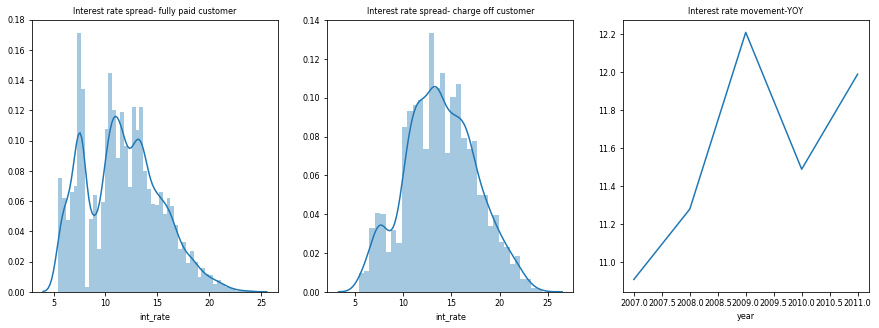

In [14]:
print(df.int_rate.describe())
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Interest rate spread- fully paid customer')
sns.distplot(df_fp.int_rate)
plt.subplot(132)
plt.title('Interest rate spread- charge off customer')
sns.distplot(df_co.int_rate)
plt.subplot(133)
plt.title('Interest rate movement-YOY')
df.groupby('year').int_rate.median().plot()

__Annual Income__
1. Below plot is done to see distribution of the Annual income profile of the two popuations- fully paid and charged off
2. Annual income centers around USD 50K for charge off customer where as for fully paid same is around USD 100K


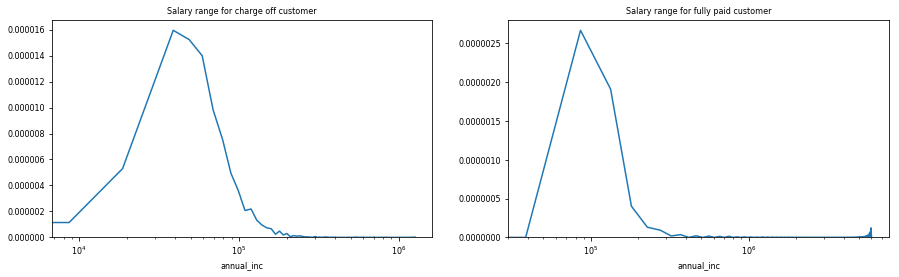

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Salary range for charge off customer')
sns.distplot(df_co.annual_inc, hist=False)
plt.xscale('log')
plt.subplot(122)
plt.title('Salary range for fully paid customer')
sns.distplot(df_fp.annual_inc, hist=False)
plt.xscale('log')

__State Wise Loan distribution__
1. Below charts are distribution of Loans between the two populations - fully paid and charge off 
2. There seems to be one to one relations between number of loans paid and charged off.

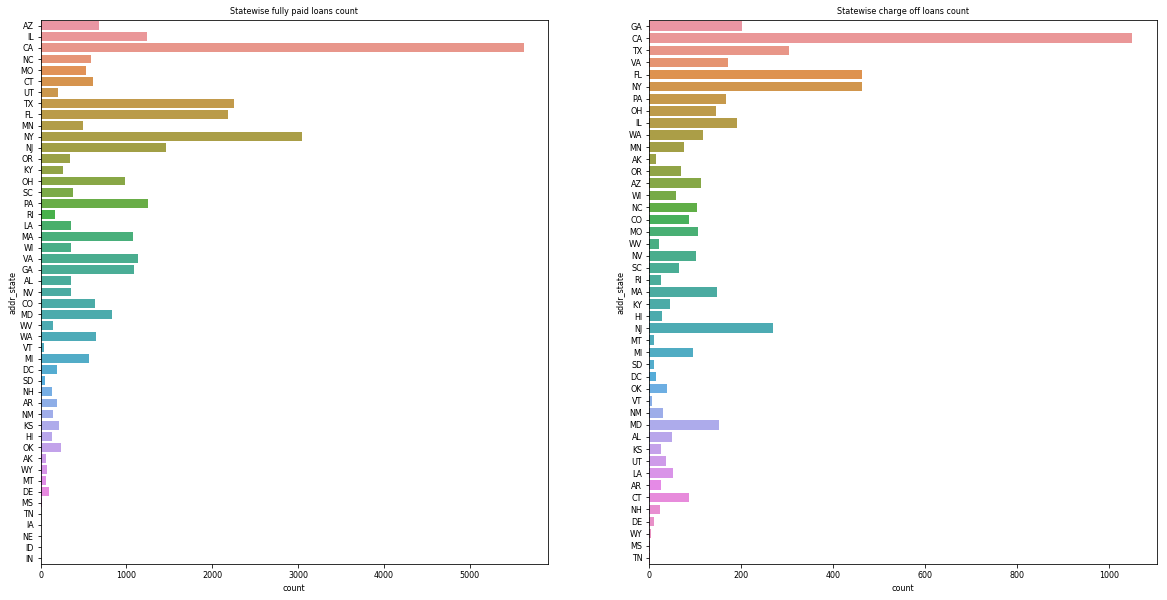

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Statewise fully paid loans count')
sns.countplot(y='addr_state', data=df_fp)
plt.subplot(122)
plt.title('Statewise charge off loans count')
sns.countplot(y='addr_state', data=df_co)

__Loan Purpose__
1. Below is distribution of Loans distributed accross various purpose mentioned
2. Around 47% of the loans are distributed towards loan consolidations - followed by payments of credit cards
3. Given the risky loans - the interest rates are higher
4. Small business shows 30% charged off loans which is maximum among all cathegories

debt_consolidation    47.0
credit_card           13.0
other                 10.0
home_improvement       7.0
major_purchase         6.0
small_business         5.0
car                    4.0
wedding                2.0
medical                2.0
moving                 1.0
house                  1.0
vacation               1.0
educational            1.0
renewable_energy       0.0
Name: purpose, dtype: float64 2


loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,151,49,1278
credit_card,501,101,4298
debt_consolidation,2623,567,14750
educational,49,0,247
home_improvement,319,94,2415
house,58,14,291
major_purchase,206,35,1849
medical,99,12,546
moving,81,7,460


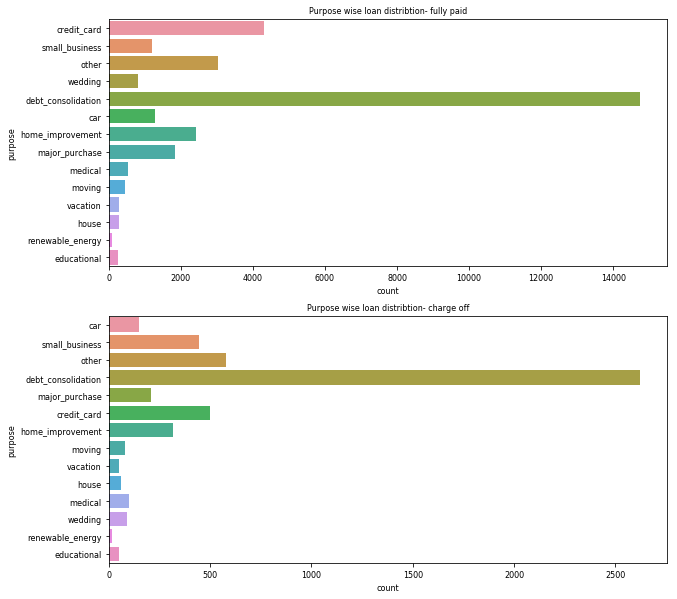

In [17]:
print(round(df.purpose.value_counts(normalize=True)*100),2)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Purpose wise loan distribtion- fully paid')
sns.countplot(y="purpose", data=df_fp)
plt.subplot(212)
plt.title('Purpose wise loan distribtion- charge off')
sns.countplot(y="purpose", data=df_co)
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df['purpose'], df['loan_status']).style.background_gradient(cmap = cm)

# Bivariate Analysis

__Income V/S Loan Status__

1. Normaly income is considered to be primary indicator of repaying capacily - however same doesnt seem to have impact on loan status as per below Pivot.
2. Further on analying the distribution of Debt to income - grade wise - there is not much difference.
3. Reason for same could be - Non includsion of Mortage debt for calculation of dti - ( Normally Mortgage related obligations are high for Individuals( Target Market)).

In [18]:
print(df.pivot_table( values='dti',index = 'loan_status', aggfunc=np.median))
df.pivot_table( values='dti',index = 'grade', aggfunc=np.median)

                dti
loan_status        
Charged Off  14.335
Current      15.010
Fully Paid   13.260


,dti
grade,
A,11.620
B,13.600
C,14.130
D,14.300
E,14.450
F,14.685
G,14.630


__Loan Status V/S Loan Amount__
1. Loan status and loan amount - doenst seem to have any significant trend- slightly higher median for charge off customer in term of loan amount
2. Average Loans - looks like have gone up given the movement of boxplot towards higher loan amount for current customers.

loan_amount,Q1,Q2,Q3,Q4
loan_status,,,,
Charged Off,3.377487,3.807589,2.633384,4.076732
Current,0.263866,0.358858,0.775767,1.498760
Fully Paid,21.892976,26.368146,16.979788,17.966647


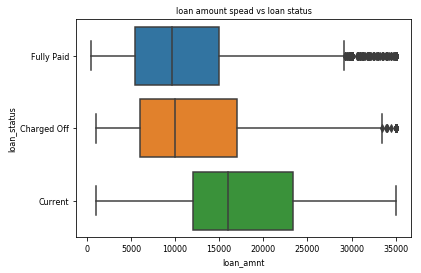

In [19]:
plt.title('loan amount spead vs loan status')
sns.boxplot(y='loan_status', x='loan_amnt', data=df)
bins=[0,5600,10000,15000,35000]
groups=['Q1','Q2','Q3','Q4']
df['loan_amount']=pd.cut(df['loan_amnt'],bins, labels=groups)
df.pivot_table( values='term',index = 'loan_status', columns = 'loan_amount', aggfunc=len).div(len(df.index)).mul(100)

__Home ownership and Loan Status__
1. No signifiant trend could be observed 

In [20]:
round(df.groupby('home_ownership').loan_status.value_counts(normalize=True)*100,2)

home_ownership  loan_status
MORTGAGE        Fully Paid     83.41
                Charged Off    12.95
                Current         3.64
OTHER           Fully Paid     81.25
                Charged Off    18.75
OWN             Fully Paid     83.56
                Charged Off    13.88
                Current         2.56
RENT            Fully Paid     82.98
                Charged Off    14.75
                Current         2.27
Name: loan_status, dtype: float64

__Loan Status and Delinquency_2yrs__
1. Delinquency with in 2 yrs/ or late payments noted seems to be criteria for loan approval - given number of loans approved decrease exponentialy with increase in late payments.
2. Also the approved loans appears to be more risy given the charge off trend- noted in Pivot.
3. Count plot for two polulations ploted for reference.

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11
loan_status,,,,,,,,,,,
Charged Off,4629.0,471.0,120.0,27.0,13.0,3.0,1.0,1.0,1.0,NaN,NaN
Current,981.0,93.0,14.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,28181.0,2592.0,514.0,171.0,43.0,18.0,9.0,3.0,1.0,1.0,1.0


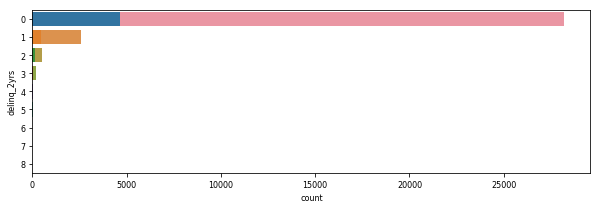

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(y='delinq_2yrs', data=df_fp)
sns.countplot(y='delinq_2yrs', data=df_co)
df.pivot_table( values='term',index = 'loan_status', columns = 'delinq_2yrs', aggfunc='count')

__Loan Status V/S Public records of Bankruptcy__
1. Number of public records appears to be criteria for loan appraisal- given drastic drop in the mentioned categories
2. Number of charge off is very high with instances of public derogs
3. Same trend continues for public recors as can be seen in next pivot

In [22]:
print(df.pub_rec_bankruptcies.value_counts(normalize=True))
df.pivot_table( values='term',index = 'loan_status', columns = 'pub_rec_bankruptcies', aggfunc='count')

0.0    0.958599
1.0    0.041216
2.0    0.000185
Name: pub_rec_bankruptcies, dtype: float64


pub_rec_bankruptcies,0.0,1.0,2.0
loan_status,,,
Charged Off,4929,335,2
Current,1063,33,2
Fully Paid,30337,1194,3


In [23]:
print(df.pub_rec.value_counts(normalize=True))
df.pivot_table( values='term',index = 'loan_status', columns = 'pub_rec', aggfunc='count')

0    0.947992
1    0.050504
2    0.001267
3    0.000185
4    0.000053
Name: pub_rec, dtype: float64


pub_rec,0,1,2,3,4
loan_status,,,,,
Charged Off,4838.0,418.0,10.0,NaN,NaN
Current,1056.0,39.0,3.0,NaN,NaN
Fully Paid,30033.0,1457.0,35.0,7.0,2.0


__Loan Amount V/S Purpose__
1. No signifiant pattern could be found - with approximately same distribution in charge off and fully paid population

In [24]:
print(df.pivot_table( values='loan_amnt',index = 'purpose', columns = 'loan_status', aggfunc='count'))

loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                       151.0     49.0      1278.0
credit_card               501.0    101.0      4298.0
debt_consolidation       2623.0    567.0     14750.0
educational                49.0      NaN       247.0
home_improvement          319.0     94.0      2415.0
house                      58.0     14.0       291.0
major_purchase            206.0     35.0      1849.0
medical                    99.0     12.0       546.0
moving                     81.0      7.0       460.0
other                     578.0    120.0      3017.0
renewable_energy           18.0      1.0        76.0
small_business            444.0     73.0      1212.0
vacation                   50.0      4.0       291.0
wedding                    89.0     21.0       804.0


__Loan Status V/S Employment Length__
1. As expected the annual income increases linearly as experience increases
2. 10+ years in employment constitute highest category - which is expected also given higher requirement in that age group
3. No mesurable relation between loan status and employement length- with ~same ration of charge off/paid for <1yrs and >10 years population.


emp_length     1 year  10+ years   2 years   3 years   4 years   5 years  \
loan_status                                                                
Charged Off  1.158372   3.435537  1.464457  1.448625  1.182120  1.195314   
Current      0.187345   1.031717  0.255950  0.219009  0.248034  0.232202   
Fully Paid   6.944958  18.644783  9.623199  8.966172  7.499076  7.134941   

emp_length    6 years   7 years   8 years   9 years  < 1 year  
loan_status                                                    
Charged Off  0.788960  0.680775  0.525094  0.411631  1.604306  
Current      0.160958  0.163597  0.116101  0.084437  0.197900  
Fully Paid   4.839306  3.768009  3.190142  2.778511  9.818460  


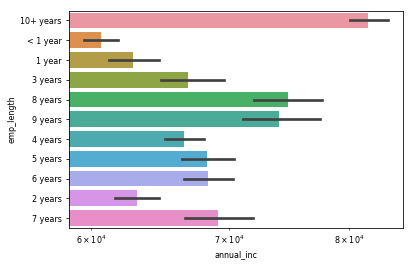

In [25]:
print(df.pivot_table( values='term',index = 'loan_status', columns = 'emp_length', aggfunc=len).div(len(df.index)).mul(100))
sns.barplot(x='annual_inc',y='emp_length',data=df)
plt.xscale('log')
# df.emp_length.value_counts()

__Loan Status V/S Revolving utilisation__
1. Loan status and percentage utilisation of limits seeme to be related given higher percentage utilisation in charge off population
2. Internal Grading for the finance company further shows same - through lower grades to population with higer utilisation.

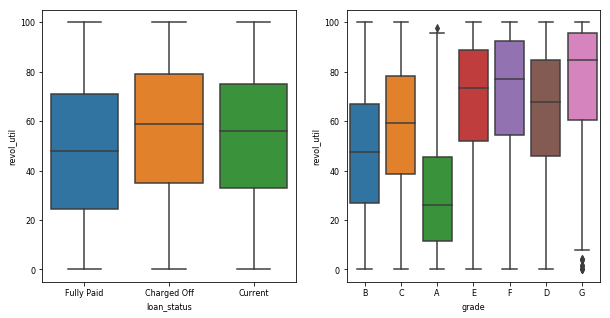

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x='loan_status',y='revol_util',data=df)
plt.subplot(122)
sns.boxplot(x='grade',y='revol_util',data=df)

__Loan term V/S Home Ownership__
1. No significant observation found

In [27]:
df.pivot_table( values='term',index = 'loan_status', columns = 'home_ownership', aggfunc='count')

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,2196.0,18.0,385.0,2667.0
Current,617.0,NaN,71.0,410.0
Fully Paid,14138.0,78.0,2318.0,15000.0


__Loan Status V/S Grade__
1. Direct Relation between loan status and Grade- with higher charge off in Lower grades.
2. Loan portfilo shows - higher concentration in lower graded loans. ( Looks like targeting of high risk customers - given higher interst rate charging opportunity)


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,552,1326,1251,1049,686,304,98
Current,35,327,257,216,175,71,17
Fully Paid,8966,9823,6223,3803,1888,635,196


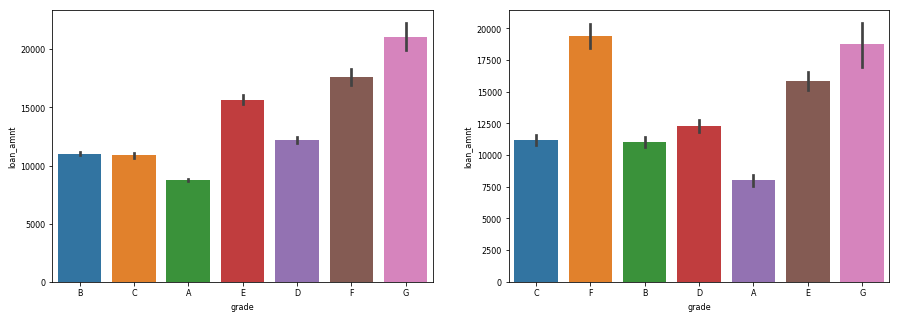

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='grade', y='loan_amnt', data=df_fp)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', data=df_co)
df.pivot_table( values='term',index = 'loan_status', columns = 'grade', aggfunc='count')

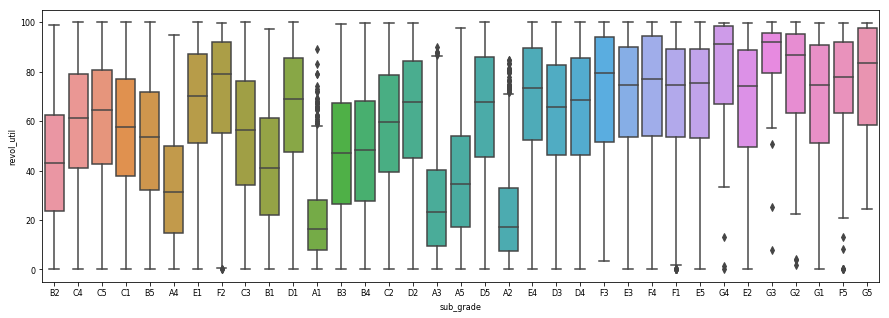

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x='sub_grade',y='revol_util',data=df)
plt.show()

__Lets convert grade column to categorical ordinal__

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


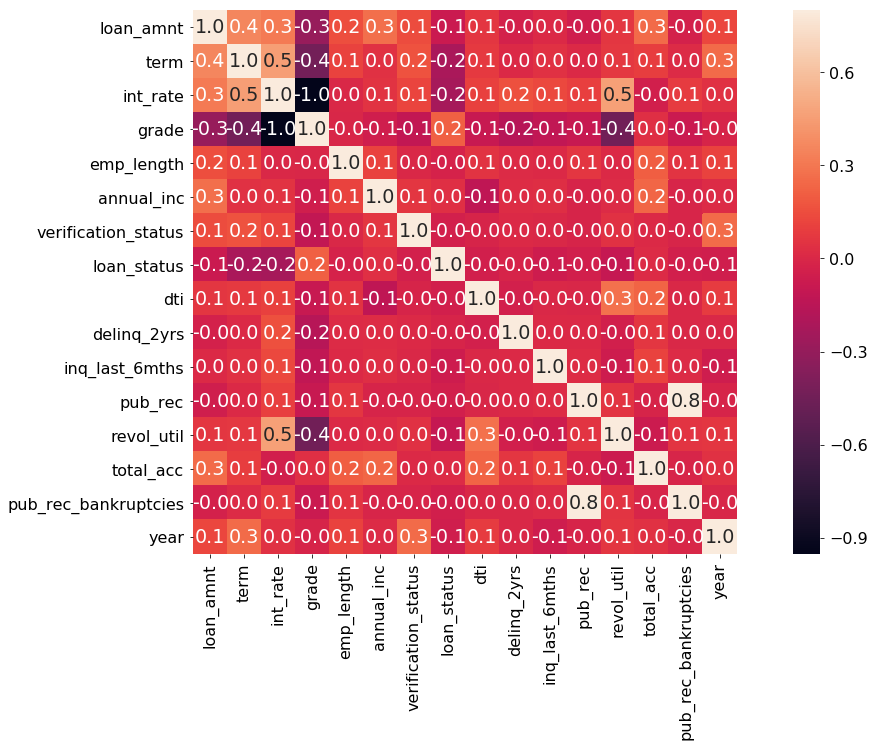

In [30]:
plt.figure(figsize=(20,10))

df_corr = df.copy()
df_corr['grade'] = df_corr['grade'].astype('category')
df_corr['grade'].cat.categories = [6,5,4,3,2,1,0]
df_corr['grade'] = df_corr['grade'].astype('float')

df_corr['verification_status'] = df_corr['verification_status'].astype('category')
df_corr['verification_status'].cat.categories = [0,2,1]
df_corr['verification_status'] = df_corr['verification_status'].astype('float')


ordered_emplength_status = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
df_corr['emp_length'] = df_corr.emp_length.astype("category",ordered=True,categories=ordered_emplength_status).cat.codes

ordered_loan_status = ['Charged Off','Current','Fully Paid']
df_corr['loan_status'] = df_corr.loan_status.astype("category",ordered=True,categories=ordered_loan_status).cat.codes
df_corr['loan_status'].value_counts()

sns.set_context("paper", font_scale=2)
sns.heatmap(df_corr.corr(), vmax=.8, square=True, annot=True, fmt='.1f')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1def0550>,
      dtype=object)

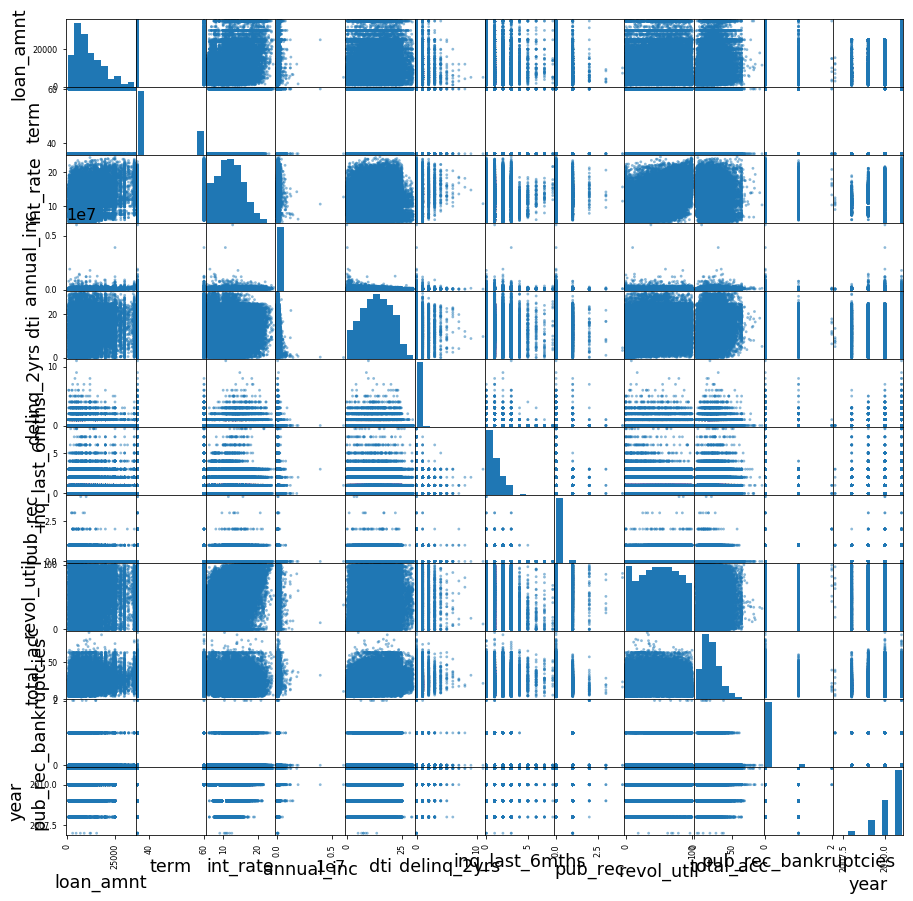

In [43]:
pd.scatter_matrix(df, figsize=(15, 15))